# REPERTOIRE

In [1]:
# C:\Users\dieud\Documents\OPENCLASSROOMS\FORMATION_DATA_SCIENTIST\PROJETS_DS_OCR\P5_Valides
# PROJET5_DATA_SCIENTIST_OCR
# Changement du repertoire: A ne plus changer.
import os
os.chdir('C://Users//dieud//Documents//OPENCLASSROOMS//FORMATION_DATA_SCIENTIST//PROJETS_DS_OCR//PROJET5')

# IMPORTATION DES LIBRAIRIES USITEES.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import DateOffset
import plotly
from plotly.offline import init_notebook_mode
import plotly.express as px
import scipy
from scipy import stats
import seaborn as sns
import sys
import sklearn
from sklearn import decomposition
from sklearn.metrics.cluster import adjusted_rand_score 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 100)

# Versions
print('Version des librairies utilisées :')

print('NumPy                 : ' + np.version.full_version)
print('Pandas                : ' + pd.__version__)
print('Python                : ' + sys.version)
print('Plotly                : ' + plotly.__version__)
print('Seaborn               : ' + sns.__version__)
print('Sklearn               : ' + sklearn.__version__)

Version des librairies utilisées :
NumPy                 : 1.21.6
Pandas                : 1.3.5
Python                : 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
Plotly                : 5.9.0
Seaborn               : 0.11.2
Sklearn               : 1.0.2


# IMPORTATION DES DATASETS.

In [3]:
df = pd.read_csv("data_finale_simulation.csv")

# Visualisation

df

,customer_unique_id,order_purchase_timestamp,recency,frequency,payment_value,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,111.0,1,141.90,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,114.0,1,27.19,4.0
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,536.0,1,86.22,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,320.0,1,43.62,4.0
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,287.0,1,196.89,5.0
...,...,...,...,...,...,...
93353,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,446.0,1,4134.84,5.0
93354,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,261.0,1,84.58,4.0
93355,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,567.0,1,112.46,5.0
93356,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,118.0,1,133.69,5.0


In [4]:
# Suppression de la variable 'customer_unique_id'

df.drop("customer_unique_id", axis = 1,inplace = True)

In [5]:
# Edition des premières et dernière dates d'achats.

print("Date du premier achat", df.order_purchase_timestamp.min())
print("Date du dernier achat", df.order_purchase_timestamp.max())

Date du premier achat 2016-09-15 12:16:38
Date du dernier achat 2018-08-29 15:00:37


In [6]:
# Commandes d'achats en formats: années, mois et jours.
df.order_purchase_timestamp = df.order_purchase_timestamp.apply(pd.to_datetime, format='%Y-%m-%d')

In [7]:
# Commandes d'achats en formats date.
df.order_purchase_timestamp = df.order_purchase_timestamp.apply(lambda x: x.date())

## I INITIALISATION AVEC UN AN DE DONNEES. 

**Période T0** = 12 mois

In [8]:
# Dataset de la période initiale.
df0 = df[df.order_purchase_timestamp <= (df.order_purchase_timestamp.min() + DateOffset(years=1))]

In [9]:
# Suppression de la variable 'order_purchase_timestamp'

df0 = df0.drop("order_purchase_timestamp", axis = 1)

# Standardisation du dataset initial.
ss = StandardScaler()
df0_scaled = pd.DataFrame(data= ss.fit_transform(df0), columns = df0.columns)

# Analyse en composantes principales pour réduction de dimension.
pca0 = decomposition.PCA(random_state = 42)
pca0.fit(df0_scaled)
projected0 = pca0.transform(df0_scaled)

# Récupération  des 3 premières composantes principales.
df0_scaled["PC1"] = projected0[:,0]
df0_scaled["PC2"] = projected0[:,1]
df0_scaled["PC3"] = projected0[:,2]
    
df0_pca0 = df0_scaled[['PC1','PC2', 'PC3']]

In [10]:
# Modèle K-MEANS du dataset iinitial, de la période initiale, 

kmeans0 = KMeans(n_clusters = 5, random_state = 1).fit(df0_pca0)

# II FONCTIONS PRINCIPALES USITEES.

In [11]:
def calc_period(data, nbdays):
    '''
    Fonction qui crée un dataframe avec 1 an + nbdays de données
        Paramètre : 
            data : dataframe 
            nbdays : entier, nombre de jours à ajouter à 365 jours
        Sortie : Dataframe de données sur l'intervalle de temps voulu
        
    '''
    return data[data.order_purchase_timestamp <= (data.order_purchase_timestamp.min() + DateOffset(days=365+nbdays))]

In [12]:
def std_pca_data(df):
    '''
    Fonction qui standardise puis réalise une ACP et réduis à 3 composantes un Dataframe
        Paramètres : 
            df : Dataframe 
        Sortie : 
            Dataframe standardisé et projeté sur ses 3 premières composantes principales 
    '''
    df = df.drop("order_purchase_timestamp", axis = 1)
    # Standardisation
    ss = StandardScaler()
    df_scaled = pd.DataFrame(data= ss.fit_transform(df), columns = df.columns)
    # Analyse en composantes principales pour réduction
    pca = decomposition.PCA(random_state = 42)
    pca.fit(df_scaled)
    projected = pca.transform(df_scaled)
    # Récupération des 3 premières composantes principales.
    df_projected = pd.DataFrame()
    df_projected["PC1"] =projected[:,0]
    df_projected["PC2"] = projected[:,1]
    df_projected["PC3"] = projected[:,2]
    
   
    return   df_projected, df_scaled   

In [13]:
def calcKmeans(df_pca): 
    '''
    Applique la segmentation K-means sur un dataframe
    
        Paramètres : 
            df_pca: dataframe (réduis avec ACP idéalement) à segmenter
        Sortie : 
            Liste des clusters calculés
    '''
    kmeans = KMeans(n_clusters = 5, random_state = 1).fit(df_pca)
    clusters = kmeans.predict(df_pca)
    
    return  clusters

In [14]:
def calc_mod_int_kmeeans(df_pca,kmeans0): 
    '''
    Applique la segmentation K-means sur un dataframe
    
        Paramètres : 
            df_pca: dataframe (réduis avec ACP idéalement) à segmenter
        Sortie : 
            Liste des clusters calculés
    '''
    clusters = kmeans0.predict(df_pca)
    cluster_labels  = kmeans0.labels_

    return  clusters

# III COMPARAISON DES MODELES.

In [15]:
ari_score = []

for i in range(0,300,20):
    # Nouveau Modèle.
    # Standardisation.
    ss = StandardScaler()
    df_projected_i, df_scaled_i = std_pca_data(calc_period(df, i))

    # Application des PCA initiales sur la nouvelle période.
    # Analyse en composantes principales pour réduction de dimension.
    pca0 = decomposition.PCA(random_state = 42)
    pca0.fit(df_scaled_i)
    projected_i0 = pca0.transform(df_scaled_i)
    
    # Eécupération des 3 premières composantes principales.
    df_projected_i0 = pd.DataFrame()
    df_projected_i0["PC1"] =projected_i0[:,0]
    df_projected_i0["PC2"] = projected_i0[:,1]
    df_projected_i0["PC3"] = projected_i0[:,2]
    
    ari_i = adjusted_rand_score(calc_mod_int_kmeeans(df_projected_i0,kmeans0),calcKmeans(df_projected_i0))
    
    ari_score.append([i,ari_i])
    

ari_score

[[0, 1.0],
 [20, 0.9092031384747327],
 [40, 0.8621640364188218],
 [60, 0.8396253187052968],
 [80, 0.2754760364853144],
 [100, 0.2881754620134508],
 [120, 0.2815037945202038],
 [140, 0.4753271581463346],
 [160, 0.6066405970585739],
 [180, 0.6095346265361733],
 [200, 0.6171628660298286],
 [220, 0.6239520050699054],
 [240, 0.5227031249958776],
 [260, 0.32405735603708663],
 [280, 0.3720639118854039]]

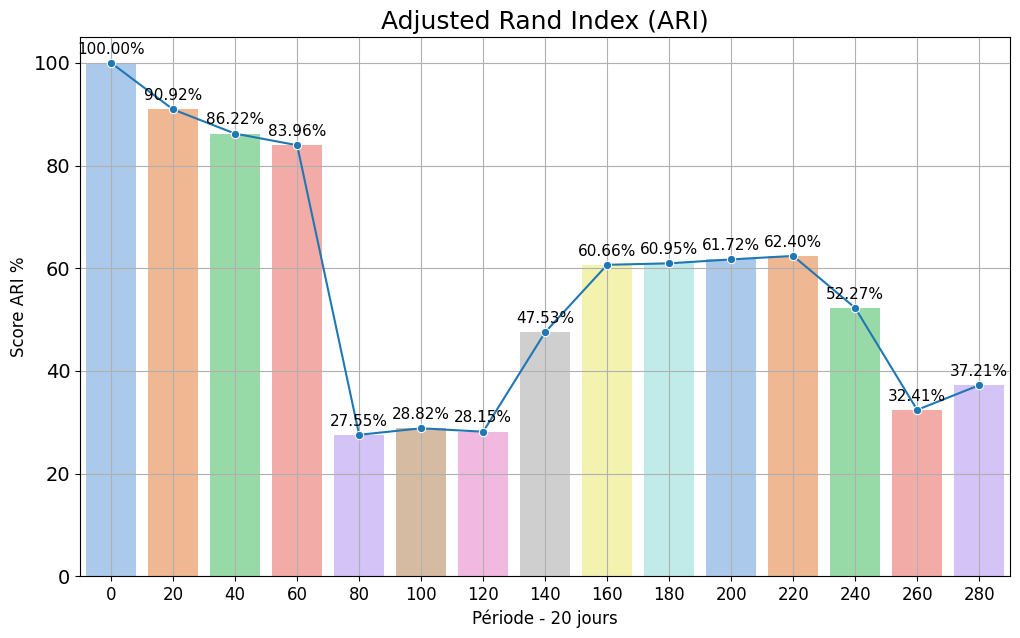

In [16]:
fig, ax = plt.subplots(figsize=(12,7))

df_ari = pd.DataFrame(ari_score, columns=["Periode", "ARI"])

sns.lineplot(x= df_ari['Periode'].index, y = df_ari['ARI']*100, data = df_ari, palette="husl", marker='o')
sns.barplot(x= df_ari['Periode'], y = df_ari['ARI']*100, data = df_ari, palette="pastel")

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    plt.annotate("%.2f" % p.get_height()+'%',
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize = 11,
                #  rotation='vertical',
                )

ax.set_ylabel('Score ARI %', fontsize=12)
# ax.set_ylim(0,100)

plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Période - 20 jours', fontsize=12)
plt.grid()

plt.title('Adjusted Rand Index (ARI)', fontsize=18)

plt.show()